In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [6]:
def load_clusters(cluster_l):
    """Load the cluster labels"""
    cluster_l = numpy.load(f"cluster_{cluster_l}.npy")
    return cluster_l

def get_latent_displacement_for_cluster(sysname, edge, cluster):
    """Get the latent displacement from feature perturbation for each cluster."""
    _lt_basedir = "/scratch/users/zilins/6.proj_ges_imi/3.gnn/model_latent_pert"
    _ds_basedir = "/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    edge_latent = numpy.load(f"{_lt_basedir}/{sysname}_pert_latent.npy")
    edge_label  = numpy.load(f"{_ds_basedir}/label_edges.npy")
    latent = edge_latent[:, numpy.squeeze(numpy.where(edge==edge_label)), :]
    
    cl = load_clusters(cluster)
    latent = latent[cl[numpy.where(cl<500)], :] if sysname=='d1' else latent[cl[numpy.where(cl>=500)]-500, :]
    
    return numpy.sum(numpy.abs(latent), axis=1)

from scipy.stats import ttest_ind

def get_welch_p_values(d1, d2):
    """Do welch test and return the p_values."""
    p_val = []
    
    for i in range(4):
        ks, p = ttest_ind(d1[i], d2[i], equal_var=False)
        p_val.append(p)
        
    return numpy.asarray(p_val)

edge_list = ["SER.64.OG:LYS.67.HZ1",     "GLU.161.OE1:TIP3.287.H1",  "IMI.286.C7:TIP3.287.OH2",
             "SER.64.OG:LYS.67.HZ3",     "ASN.127.OD1:LYS.67.HZ2",   "ASN.127.OD1:IMI.286.H15O", "GLU.161.OE1:LYS.67.HZ2", 
             "GLU.161.OE2:SER.165.HG1",  "GLU.161.OE1:IMI.286.H15O", "SER.165.OG:TIP3.287.H2",   "IMI.286.O15:LYS.67.HZ1",   
             "IMI.286.O15:ASN.127.HD22", "IMI.286.C7:IMI.286.O15",   "TIP3.287.OH2:LYS.67.HZ1",  "TIP3.287.OH2:IMI.286.H15O",
             "SER.64.OG:SER.64.HG1",     "IMI.286.O7:SER.64.HG1"
            ]
edge_label= [r"Ser70 O$\gamma$ - Lys73 H$\zeta$1",      r"Glu166 O$\epsilon$1 - Water H1",        "IPM C7 - Water O",
             r"Ser70 O$\gamma$ - Lys73 H$\zeta$3",      r"Asn132 O$\delta$ - Lys73 H$\zeta$2",    r"Asn132 O$\delta$ - IPM HO6$\alpha$",  r"Glu166 O$\epsilon$1 - Lys73 H$\zeta$2",
             r"Glu166 O$\epsilon$2 - Ser170 H$\gamma$", r"Glu166 O$\epsilon$1 - IPM HO6$\alpha$", r"Ser170 O$\gamma$ - Water H2", r"IPM O6$\alpha$ - Lys73 H$\zeta$1",
             r"IPM O6$\alpha$ - Asn132 H$\delta$2",     r"IPM C7 - IPM O6$\alpha$",               r"Water O - Lys73 H$\zeta$1",   r"Water O - IPM HO6$\alpha$",
             r"Ser70 O$\gamma$ - IPM H4",     "IPM O7 - IPM H4"]

q=get_latent_displacement_for_cluster('d2', edge_list[1], 1)


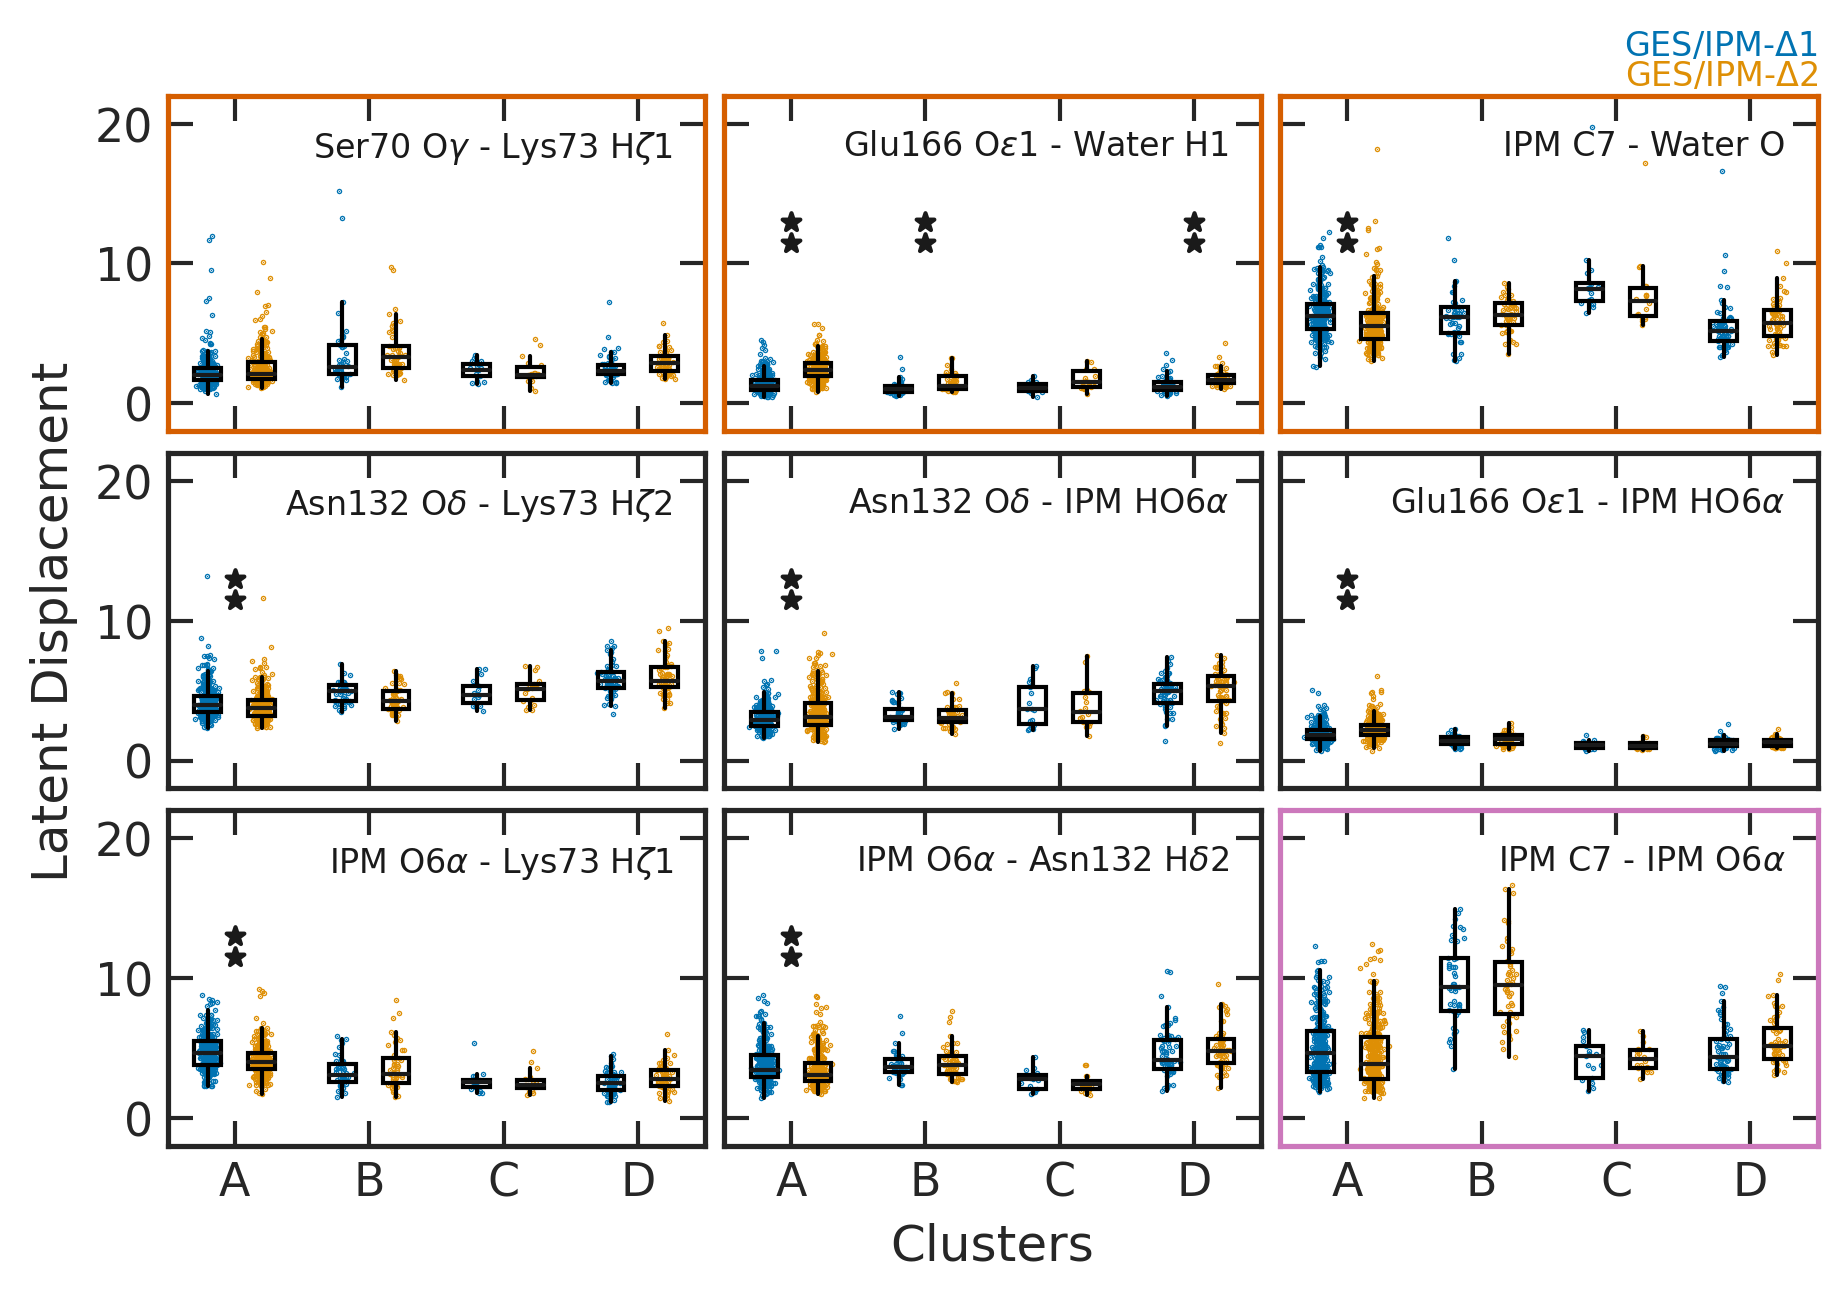

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(7.5, 4.5), dpi=300, sharex=True, sharey=True)
plt.subplots_adjust(left=1./7.5, right=6.5/7.5, top=4./4.5, bottom=.5/4.5, wspace=.035, hspace=.065)


ax_idx=0
for el in [0,1,2,4,5,8,10,11,12]:
    ax = axes[ax_idx//3, ax_idx%3]
    ax_idx+=1
    
    d1_clusters = [get_latent_displacement_for_cluster('d1', edge_list[el], c) for c in range(4)]
    d2_clusters = [get_latent_displacement_for_cluster('d2', edge_list[el], c) for c in range(4)]
    
    d1_boxes=ax.boxplot(x=d1_clusters, positions=numpy.arange(4)-0.2, widths=0.2, showcaps=False, 
                        showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
    d2_boxes=ax.boxplot(x=d2_clusters, positions=numpy.arange(4)+0.2, widths=0.2, showcaps=False, 
                        showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
        
    plt.setp(d1_boxes["boxes"], facecolor='#00000000')
    plt.setp(d2_boxes["boxes"], facecolor='#00000000')
    
    for i in range(4):
        ax.scatter(y=d1_clusters[i], x=numpy.random.normal(loc=numpy.arange(4)[i]-0.2, scale=0.03, 
                   size=d1_clusters[i].shape[0]), s=0.1, color=sns.color_palette('colorblind')[0])
        ax.scatter(y=d2_clusters[i], x=numpy.random.normal(loc=numpy.arange(4)[i]+0.2, scale=0.03, 
                   size=d2_clusters[i].shape[0]), s=0.1, color=sns.color_palette('colorblind')[1])
            
    ax.text(0.94, 0.90, edge_label[el], ha='right', va='top', transform=ax.transAxes, fontsize=8, color='k')
        
    ax.tick_params(which='major', direction='in', length=6, width=1)
    ax.set_xlim(-.5, 3.5)
    ax.set_ylim(-2., 22.)
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(['A', 'B', 'C', 'D'])
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
        
    if el==2:
        ax.text(1., 1.10, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
        ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])
        
    if el==4:
        ax.set_ylabel(r'Latent Displacement')
        
    if el==11:
        ax.set_xlabel(r'Clusters')
        
    if el in [0,1,2]:
        ax.spines['bottom'].set_color(sns.color_palette('colorblind')[3])
        ax.spines['top'].set_color(sns.color_palette('colorblind')[3])
        ax.spines['right'].set_color(sns.color_palette('colorblind')[3])
        ax.spines['left'].set_color(sns.color_palette('colorblind')[3])
    
    if el==12:
        ax.spines['bottom'].set_color(sns.color_palette('colorblind')[4])
        ax.spines['top'].set_color(sns.color_palette('colorblind')[4])
        ax.spines['right'].set_color(sns.color_palette('colorblind')[4])
        ax.spines['left'].set_color(sns.color_palette('colorblind')[4])
        
    p_value = get_welch_p_values(d1_clusters, d2_clusters)
    # p_x = numpy.arange(4)
    # p_x = p_x[(p_value<=0.05) &(p_value>0.001)]
    # if p_x.size>0:
    #     ax.scatter(p_x, numpy.ones(p_x.shape)*12, s=20, color='k', marker='*')
    p_x = numpy.arange(4)
    p_x = p_x[p_value<=0.001]
    if p_x.size>0:
        ax.scatter(p_x, numpy.ones(p_x.shape)*11.5, s=20, color='k', marker='*')
        ax.scatter(p_x, numpy.ones(p_x.shape)*13., s=20, color='k', marker='*')
    
fig.savefig(f'cluster_focus_latent.png')